### exercise 1 linear regression
### task 2 multiple linear regression

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# we already know that there are some rows in the data frame that contain question marks, indication missing values
# we need to mark them as na values
auto_df = pd.read_csv(r'.\datasets\Auto.csv',na_values='?')
# drop rows with na values
auto_df = auto_df.dropna() 

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


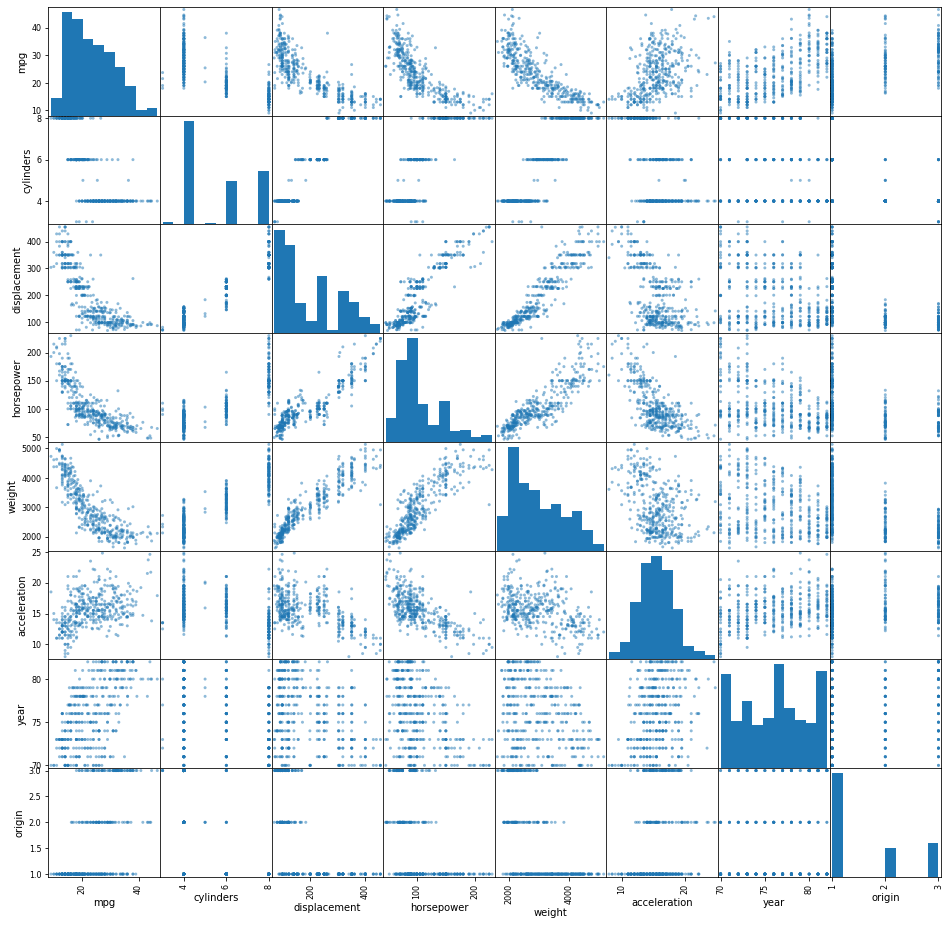

In [3]:
scatter_matrix(auto_df,alpha=0.5, figsize=(16,16));

In [4]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [5]:
X = sm.add_constant(auto_df.iloc[:,1:-1])
y = auto_df.mpg

model = sm.OLS(y,X)
estimate = model.fit()

print(estimate.summary())
print('\n', estimate.ssr)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.04e-139
Time:                        01:12:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [6]:
VIFs = [(predictor, variance_inflation_factor(X.values,_)) \
        for _,predictor in enumerate(list(X))] # list(X) returns column names of df

print('Variance Inflation Factors')
for tup in VIFs:
    print('{:20}'.format(tup[0]), '{:.3f}'.format(tup[1]))

Variance Inflation Factors
const                763.558
cylinders            10.738
displacement         21.837
horsepower           9.944
weight               10.831
acceleration         2.626
year                 1.245
origin               1.772


The variance inflation factors are larger for cylinders, displacement, horsepower and weight. This indicates multi-collinearity.

If VIF=1 (minimum value): absence of collinearity
Usually, there is collinearity when VIF>5 

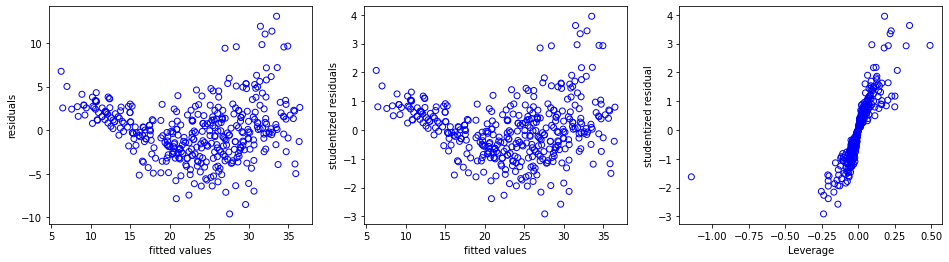

In [7]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

Comments:  
- The residuals plot indicate non-linearity in the data. The U-Shape means the fit is worse at the extreme values of the fit. 
- The studentized residuals show that multiple points are outliers (since greater than 3).
- The leverage plot shows several high leverage points. These are points with leverage greater than $(p+1)/n=8/392\approx 0.02$. Several of these points are also outliers. Hence, these points strongly influence the coefficient estimates.

In [8]:
auto_df['weight*year'] = auto_df.weight*auto_df.year
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,weight*year
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,245280
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,258510
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,240520
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,240310
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,241430


In [9]:
X_interaction = sm.add_constant(auto_df[['weight','year','weight*year']])
y = auto_df.mpg

model = sm.OLS(y,X_interaction)
estimate = model.fit()

print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     649.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          8.06e-151
Time:                        01:12:46   Log-Likelihood:                -1009.3
No. Observations:                 392   AIC:                             2027.
Df Residuals:                     388   BIC:                             2043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -110.4519     12.947     -8.531      

In [10]:
auto_df['weight**2'] = auto_df.weight**2

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,weight*year,weight**2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,245280,12278016
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,258510,13638249
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,240520,11806096
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,240310,11785489
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,241430,11895601


In [11]:
X_quadratic = sm.add_constant(auto_df[['weight','weight**2','year', 'weight*year']])

model = sm.OLS(y,X_quadratic)
quadratic_estimate = model.fit()

print(quadratic_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     577.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.21e-161
Time:                        01:12:46   Log-Likelihood:                -980.70
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     387   BIC:                             1991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -53.4414     14.093     -3.792      

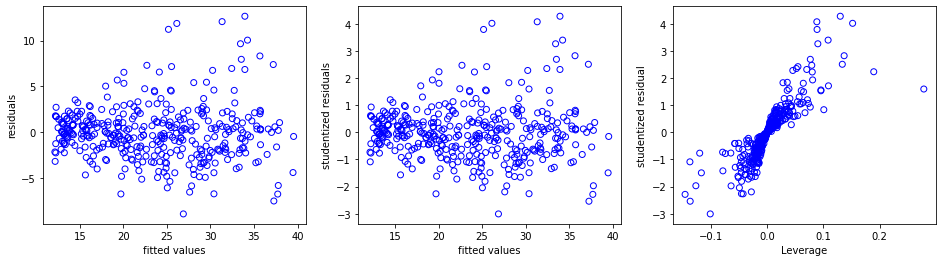

In [12]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = quadratic_estimate.fittedvalues
residuals = quadratic_estimate.resid.values
studentized_residuals = OLSInfluence(quadratic_estimate).resid_studentized_internal
leverages = OLSInfluence(quadratic_estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

Comment: 
- The weight*year is significant, but the weight term is no longer significant.
- We see that the U-shaped pattern is reduced, even if there are some highest and lowest (more highest than lowest) mpgs values which we are underestimating with our fit.

In [13]:
auto_df['weight**(1/2)'] = auto_df.weight**(1/2)

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,weight*year,weight**2,weight**(1/2)
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,245280,12278016,59.194594
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,258510,13638249,60.770058
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,240520,11806096,58.617404
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,240310,11785489,58.591808
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,241430,11895601,58.728187


In [14]:
X_quadratic = sm.add_constant(auto_df[['weight','weight**(1/2)','year', 'weight*year']])

model = sm.OLS(y,X_quadratic)
quadratic_estimate = model.fit()

print(quadratic_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     578.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          9.14e-162
Time:                        01:12:46   Log-Likelihood:                -980.41
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     387   BIC:                             1991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.7835     18.259     -0.152

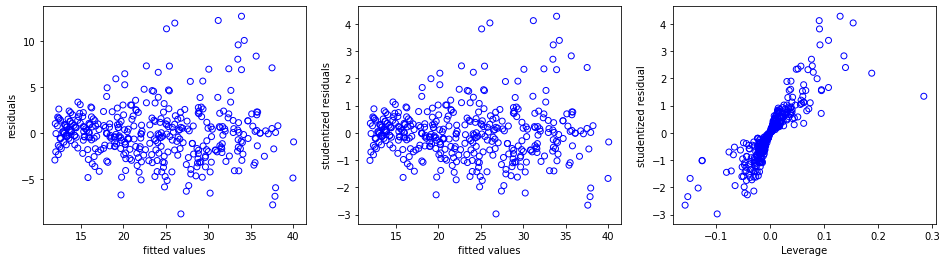

In [15]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = quadratic_estimate.fittedvalues
residuals = quadratic_estimate.resid.values
studentized_residuals = OLSInfluence(quadratic_estimate).resid_studentized_internal
leverages = OLSInfluence(quadratic_estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

In [16]:
auto_df['log(weight)'] = np.log(auto_df.weight)

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,weight*year,weight**2,weight**(1/2),log(weight)
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,245280,12278016,59.194594,8.161660
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,258510,13638249,60.770058,8.214194
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,240520,11806096,58.617404,8.142063
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,240310,11785489,58.591808,8.141190
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,241430,11895601,58.728187,8.145840


In [17]:
X_quadratic = sm.add_constant(auto_df[['weight','log(weight)','year', 'weight*year']])

model = sm.OLS(y,X_quadratic)
quadratic_estimate = model.fit()

print(quadratic_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     577.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.23e-161
Time:                        01:12:47   Log-Likelihood:                -980.72
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     387   BIC:                             1991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         171.4820     38.102      4.501      

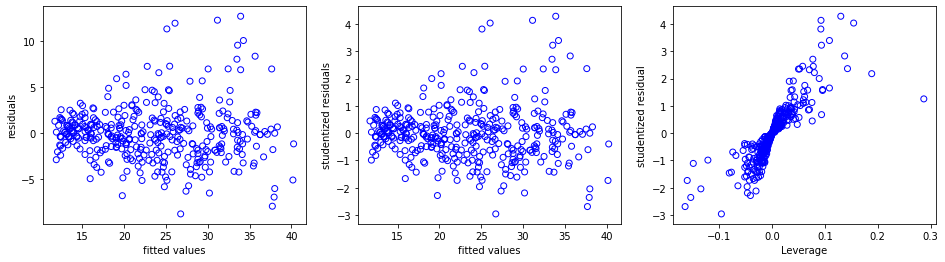

In [18]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = quadratic_estimate.fittedvalues
residuals = quadratic_estimate.resid.values
studentized_residuals = OLSInfluence(quadratic_estimate).resid_studentized_internal
leverages = OLSInfluence(quadratic_estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');